# Sarsa & Q Learning
In this exercise you are going to implement two algorithms: `SARSA` and `Q-Learning`.
Both `SARSA` and `Q-Learning` are examples of `Temporal Diference` (TD) algorithms. The main diference is in update rule. `SARSA` is an On-policy method - we are computing $TD_{target}$ using the same policy that we used for explorarion ($\epsilon-Greedy$): 

$Q(S_t, A_t) = Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)$

whereas in `Q-Learning` we are using $\epsilon-Greedy$ policy to explore, and $Greedy$ policy to compute $TD_{target}$:

$Q(S_t, A_t) = Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max\limits_{a'} Q(S_{t+1}, a') - Q(S_t, A_t)$

In the first two task you are going to work with the [Cliff Walking](https://www.gymlibrary.dev/environments/toy_text/cliff_walking/) environment, whereas in task 3 the [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/) enviornment will be used.


### Tasks Overview
1. Task 1: SARSA and [Cliff Walking](https://www.gymlibrary.dev/environments/toy_text/cliff_walking/) environment.

2. Task 2: Q-Learning and [Cliff Walking](https://www.gymlibrary.dev/environments/toy_text/cliff_walking/) environment
    - In `agents.py` complete the `QLearningAgent` class (you must compliete `get_action` and `update` methods)
    - set the parameters $\alpha$, $\gamma$, and $\epsilon$ for the `qAgent`
    - Complete the learning loop in this notebook. Run it and train the agent.
    - Test the agent. You may test it by using `python render.py -a QLearning` from the command line. Make sure that your agent chooses actions correctly.
3. Task 3. [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/) enviornment
    - Apply both `SARSA` and `QLearning` agents for the [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/) enviornment. Test the results.




In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from agents import SarsaAgent, QLearningAgent

## Cliff walking Environment.
![alt text](https://www.gymlibrary.dev/_images/cliff_walking.gif)

### Task 1 - SARSA
1. In `agents.py` complete the `SarsaAgent` class (you must complete `get_action` and `update` methods).
2. Set the parameters $\alpha$, $\gamma$, and $\epsilon$ for the `sarsaAgent`.
3. Complete the learning loop in this notebook. Run it and train the agent.
5. Test the agent. You may test it by using `python render.py -a SARSA` from the command line. Make sure that your agent chooses actions correctly. Change the parameters from point 2 or increase the number of training episodes if necessary.

In [2]:
env = gym.make('CliffWalking-v0')
# YOUR CODE HERE
# Set the parameters of the agent
sarsaAgent = SarsaAgent(env, alpha=0.2, gamma=0.95, epsilon=0.2)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\Przemek\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
100%|██████████| 500/500 [00:00<00:00, 967.85it/s] 


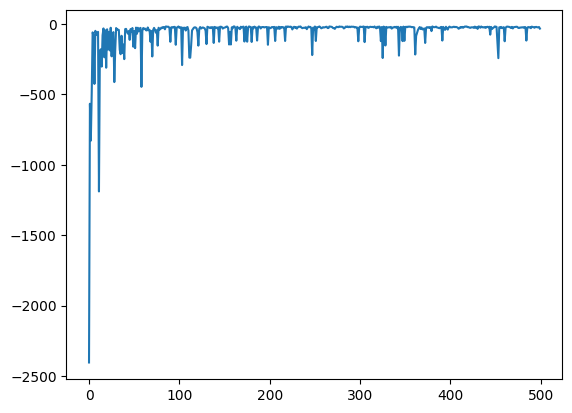

In [3]:
sarsa_Rewards = []
# YOUR CODE HERE
# Change the number of episodes, if necessary
for episode in tqdm(range(500)):
    episode_reward = 0
    state, info = env.reset()
    
    # Use the agent to choose the first action
    action = sarsaAgent.get_action(state) # YOUR CODE HERE
    done = False
    while not done:
        # Perform the selected action
        next_state, reward, done, truncated, info = env.step(action) # YOUR CODE HERE
        # Select next action        
        next_action = sarsaAgent.get_action(next_state) # YOUR CODE HERE
        # Update the agent
        sarsaAgent.update(state, action, reward, next_state, next_action) # YOUR CODE HERE
        
        
        
        # Assign the next state and action to the current ones
        state =  next_state # YOUR CODE HERE
        action = next_action # YOUR CODE HERE
        episode_reward += reward
    sarsa_Rewards.append(episode_reward)

sarsaAgent.save()
plt.plot(sarsa_Rewards)

### Task 2 - Q-Learning
1. In `agents.py` complete the `QLearningAgent` class (you must complete `get_action` and `update` methods)
2. Set the parameters $\alpha$, $\gamma$, and $\epsilon$ for the `qAgent`
3. Complete the learning loop in this notebook. Run it and train the agent.
4. Test the agent. You may test it by using `python render.py -a QLearning` from the command line. Make sure that your agent chooses actions correctly. Change the parameters from point 2 or increase the number of training episodes if necessary.

In [4]:
# YOUR CODE HERE
# Set the parameters of the agent
qAgent = QLearningAgent(env, alpha=0.2, gamma=0.95, epsilon=0.2)

100%|██████████| 500/500 [00:01<00:00, 482.34it/s]


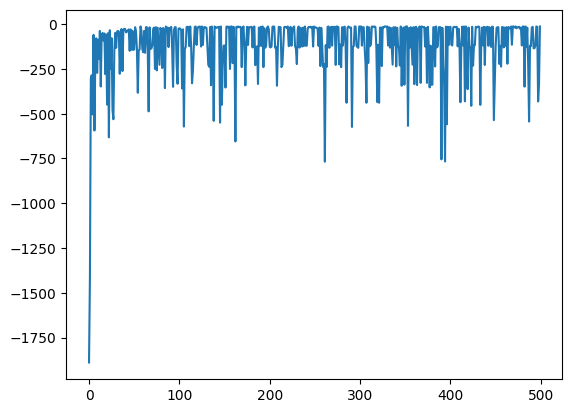

In [5]:
Q_rewards = []
for episode in tqdm(range(500)):
    episode_reward = 0
    state, info = env.reset()
    done = False
    while not done:
        # Choose an action
        action = qAgent.get_action(state) # YOUR CODE HERE
        
        # Perform the selected action
        next_state, reward, done, truncated, info = env.step(action) # YOUR CODE HERE

        # Update the agent
        # YOUR CODE HERE
        qAgent.update(state, action, reward, next_state)
        # Assign the next state to the current one
        state = next_state # YOUR CODE HERE
        
        episode_reward += reward
    Q_rewards.append(episode_reward)
        
qAgent.save()
plt.plot(Q_rewards)

## Taxi Environment
![alt text](https://www.gymlibrary.dev/_images/taxi.gif)

### - Task 3 - Taxi environment
- Apply both `SARSA` and `QLearning` agents for the [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/) enviornment. Note that you may want to save the $Q_{estimated}$ values in the different files. You can do it using a parameter in `agent.save` method, for example: `sarsaAgent.save('Taxi_Sarsa.npy')` and `QAgent.save('Taxi_Q.npy')`
- Test the agents. If you saved the parameters as above, you may test them using `python render.py -a SARSA -e Taxi-v3 -f Taxi_Sarsa.npy` for SARSA and `python render.py -a QLearning -e Taxi-v3 -f Taxi_Q.npy` for Q-Learning. Make sure that your agent chooses actions correctly. Change the agent parameters the number of training episodes if necessary.


*Note: I noticed that the environment sometimes does not render correctly (rendering is not displayed despite the correct actions taken). If you observe something like this double-check the printed states - it may be simply the environment error.* 


In [6]:
env = gym.make('Taxi-v3')
# YOUR CODE HERE
sarsaAgent = SarsaAgent(env, alpha=0.2, gamma=0.95, epsilon=0.2)
qAgent = QLearningAgent(env, alpha=0.2, gamma=0.95, epsilon=0.2)
sarsa_Rewards = []
Q_rewards = []

100%|██████████| 2000/2000 [00:03<00:00, 539.42it/s] 


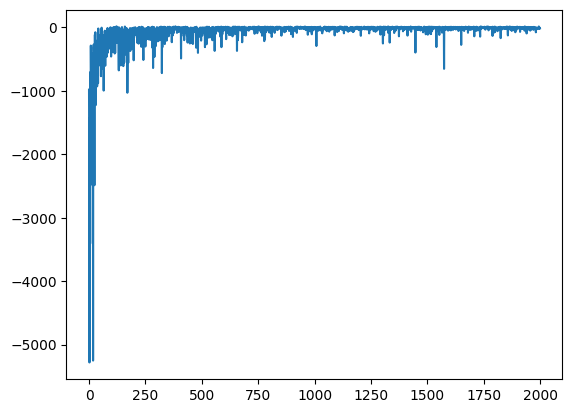

In [7]:
# YOUR CODE HERE
# Change the number of episodes, if necessary
for episode in tqdm(range(2000)):
    episode_reward = 0
    state, info = env.reset()

    # Use the agent to choose the first action
    action = sarsaAgent.get_action(state) # YOUR CODE HERE
    done = False
    while not done:
        # Perform the selected action
        next_state, reward, done, truncated, info = env.step(action) # YOUR CODE HERE
        # Select next action
        next_action = sarsaAgent.get_action(next_state) # YOUR CODE HERE
        # Update the agent
        sarsaAgent.update(state, action, reward, next_state, next_action) # YOUR CODE HERE



        # Assign the next state and action to the current ones
        state =  next_state # YOUR CODE HERE
        action = next_action # YOUR CODE HERE
        episode_reward += reward
    sarsa_Rewards.append(episode_reward)

sarsaAgent.save('Taxi_S.npy')
plt.plot(sarsa_Rewards)

100%|██████████| 2000/2000 [00:03<00:00, 561.66it/s] 


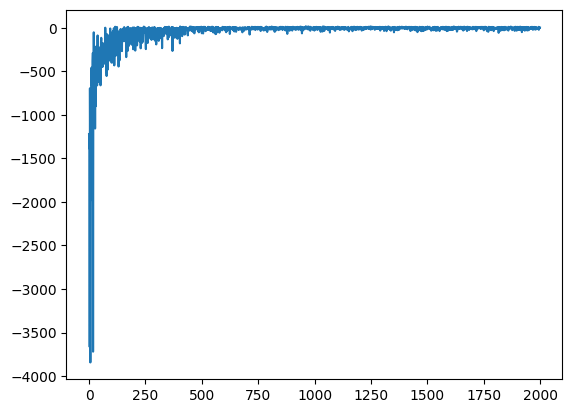

In [8]:
# YOUR CODE HERE
for episode in tqdm(range(2000)):
    episode_reward = 0
    state, info = env.reset()
    done = False
    while not done:
        # Choose an action
        action = qAgent.get_action(state) # YOUR CODE HERE

        # Perform the selected action
        next_state, reward, done, truncated, info = env.step(action) # YOUR CODE HERE

        # Update the agent
        # YOUR CODE HERE
        qAgent.update(state, action, reward, next_state)
        # Assign the next state to the current one
        state = next_state # YOUR CODE HERE

        episode_reward += reward
    Q_rewards.append(episode_reward)

np.save('Taxi_Q.npy', qAgent.Q_est)
plt.plot(Q_rewards)